# ***Data Loading and Overview:***

Term deposits are a major source of income for a bank. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [11]:
df=pd.read_csv("banking.csv",sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Detailed Column Descriptions
bank client data:

1 - age (numeric)
2 - job : type of job
3 - marital : marital status
4 - education
5 - default: has credit in default? (binary: "yes","no")
6 - balance: average yearly balance, in euros (numeric)
7 - housing: has housing loan? (binary: "yes","no")
8 - loan: has personal loan? (binary: "yes","no")
# related with the last contact of the current campaign:
9 - contact: contact communication type
10 - day: last contact day of the month (numeric)
11 - month: last contact month of year
12 - duration: last contact duration, in seconds (numeric)
# other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)
16 - poutcome: outcome of the previous marketing campaign

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [12]:
df.shape

(45211, 17)

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [15]:
# Checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [16]:
# Describing the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [17]:
# Checking for missing values(null)
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [18]:
#checking for duplicate values
df.loc[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


## **EDA(Exploratory Data Analysis)**

Categorical Features: ["job", "marital", "education", "default", "housing", "loan", "poutcome", "y"]

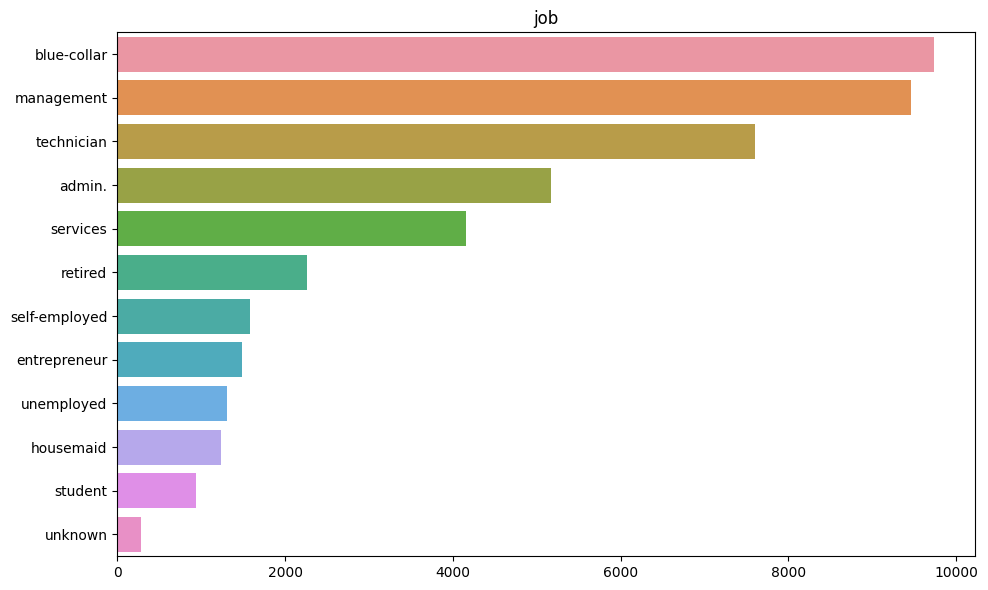

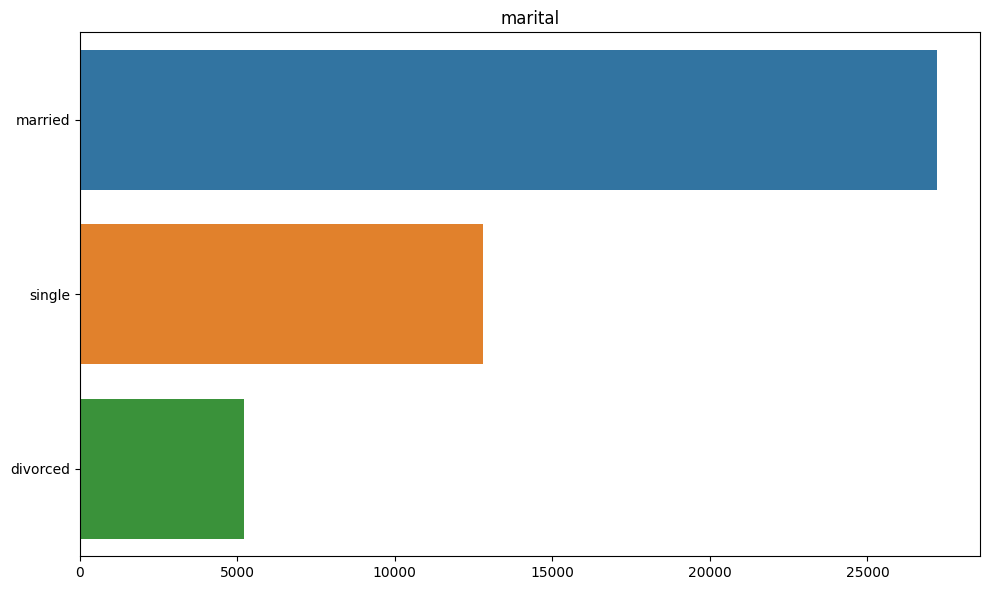

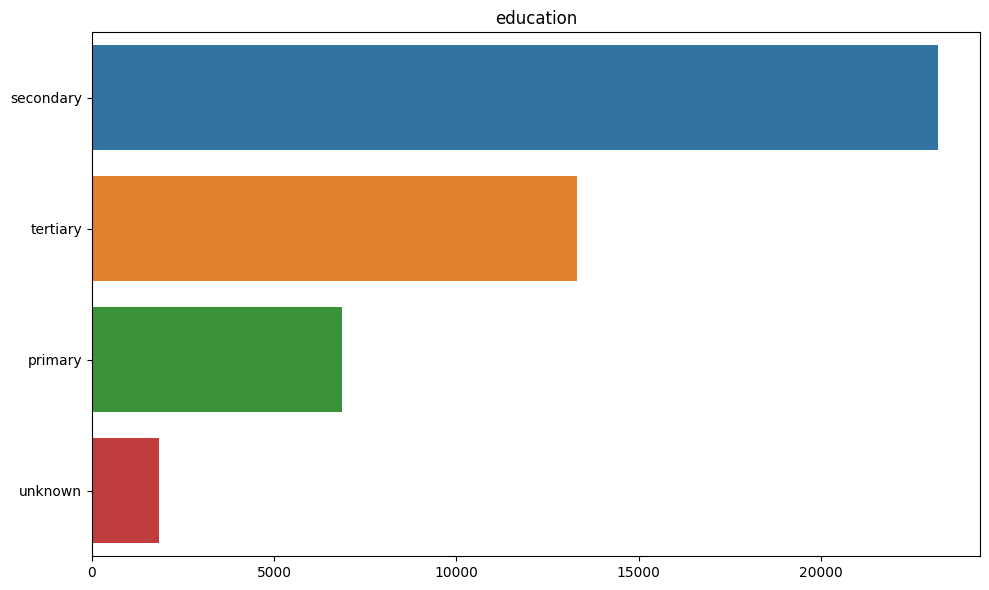

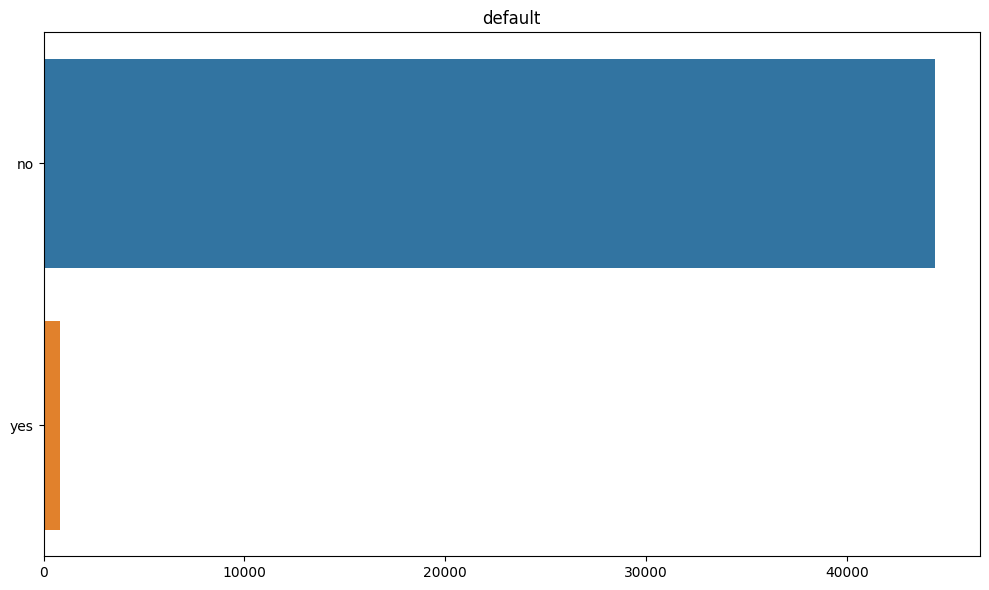

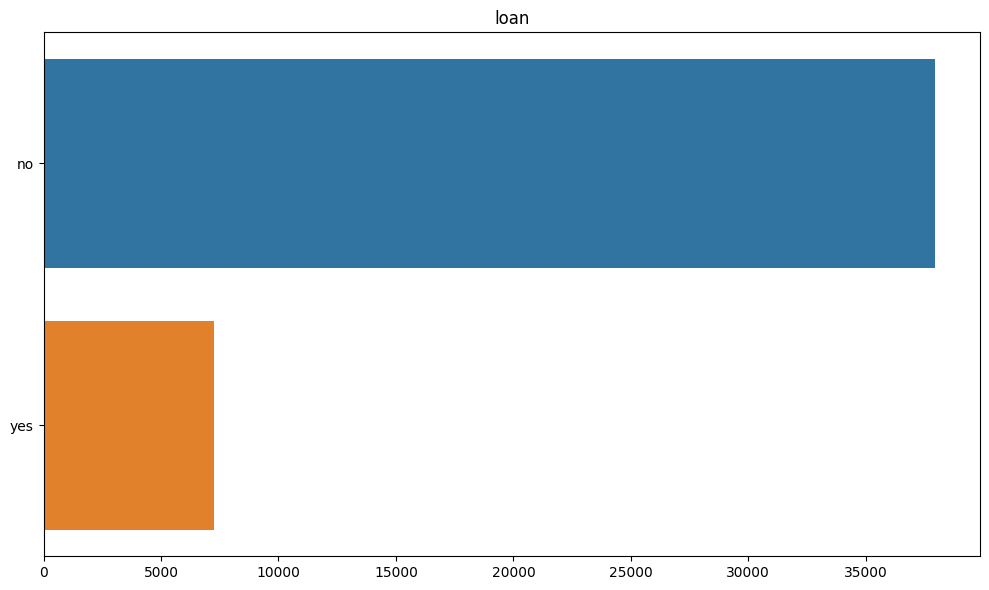

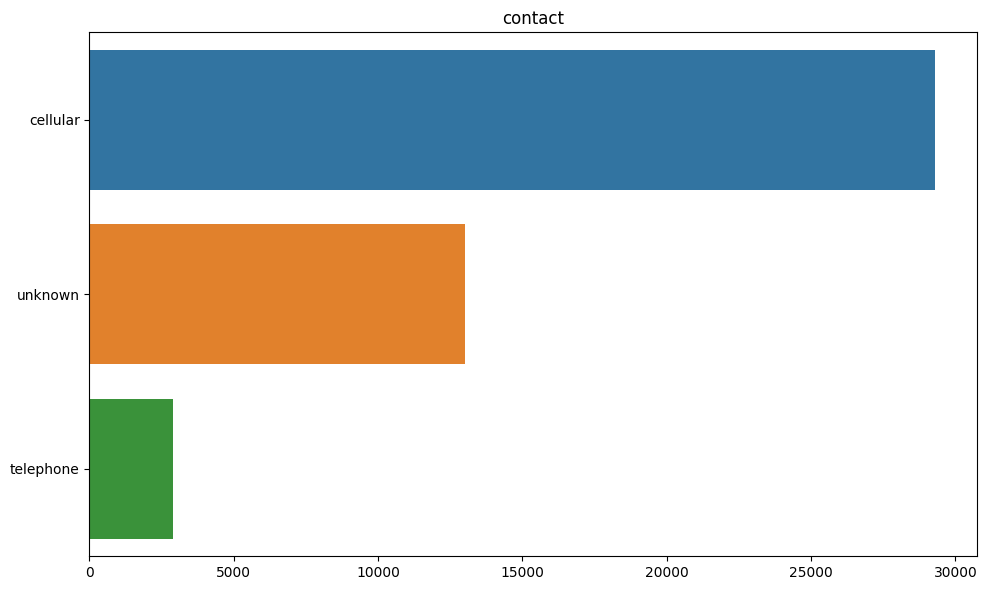

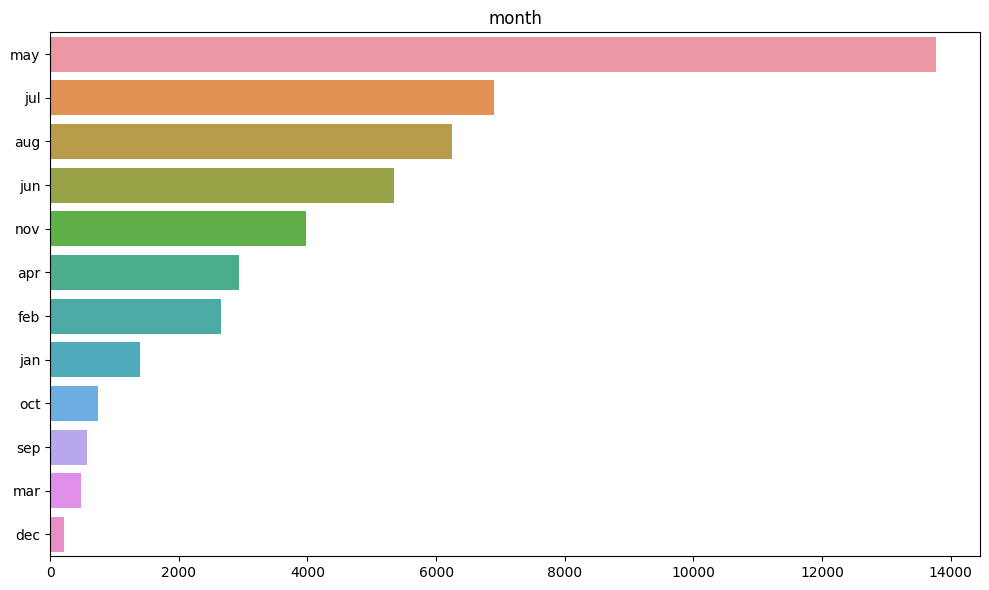

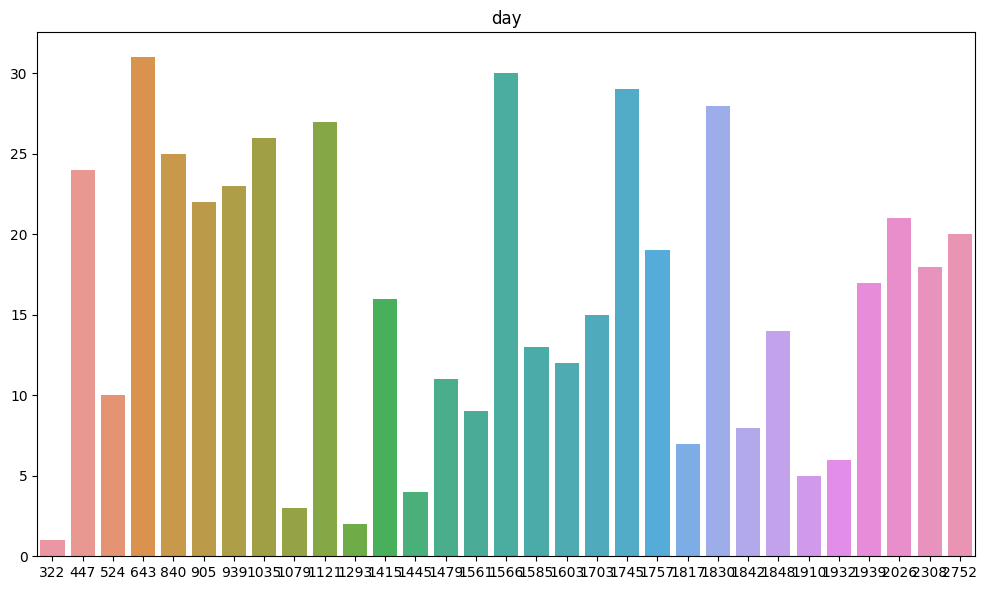

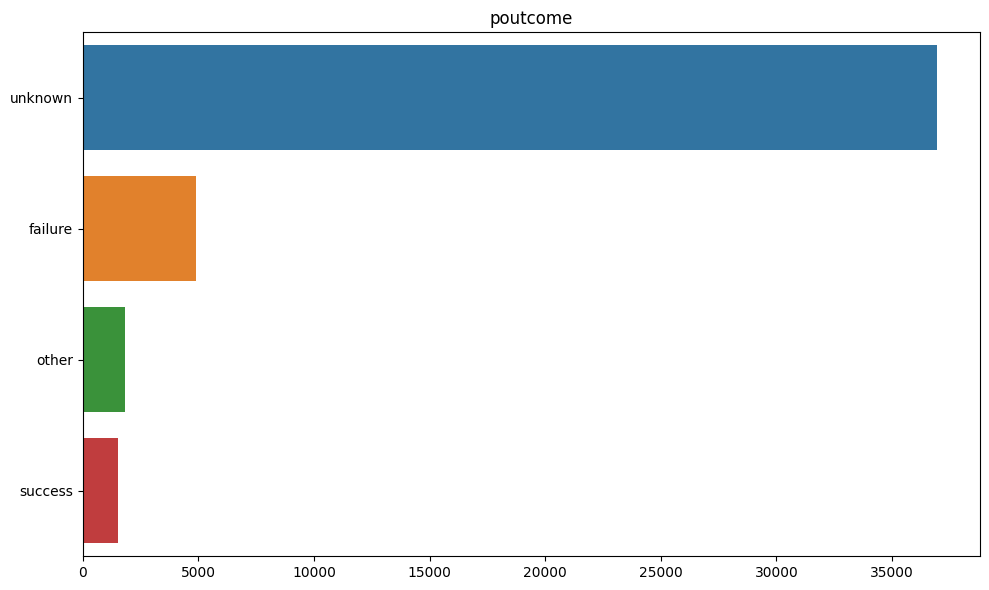

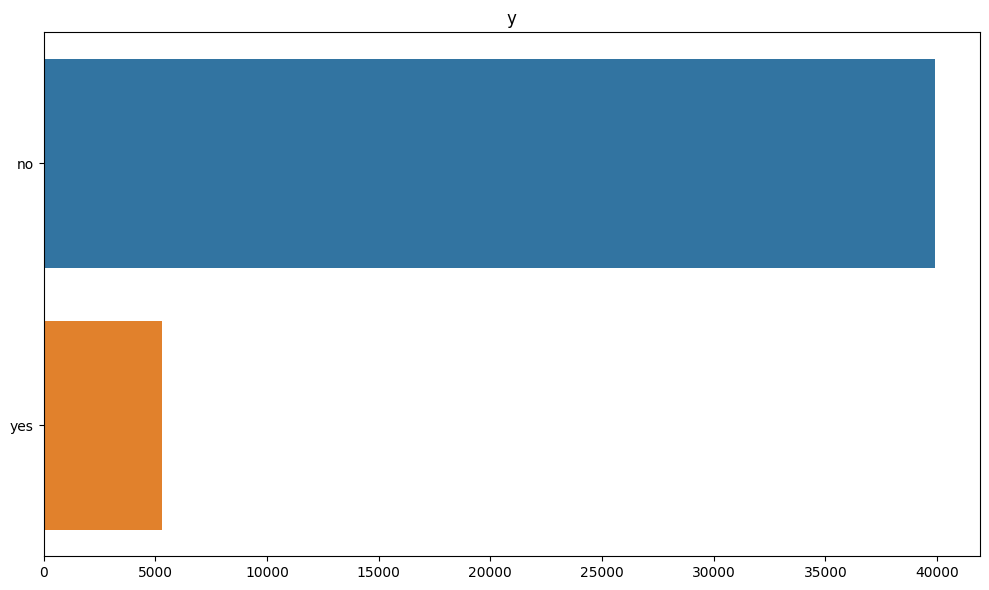

In [24]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,6))
    sns.barplot(x=df[col].value_counts().values,y=df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()
    plt.show()

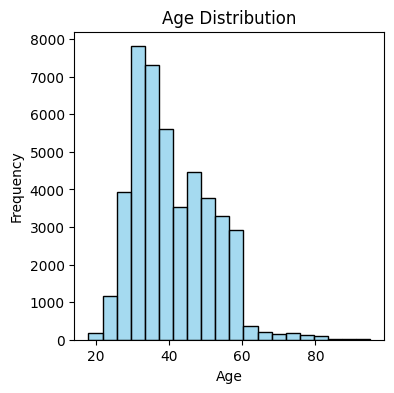

In [8]:
plt.figure(figsize=(4, 4))
sns.histplot(df['age'], bins=20, color='skyblue', edgecolor='black', kde=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

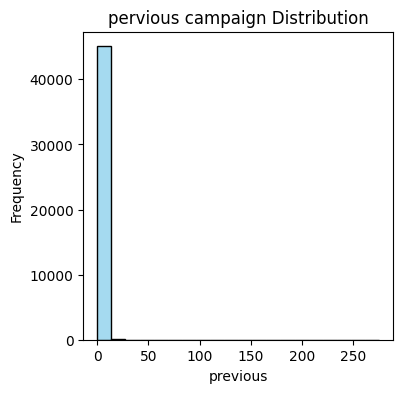

In [7]:
plt.figure(figsize=(4, 4))
sns.histplot(df['previous'], bins=20, color='skyblue', edgecolor='black', kde=False)
plt.xlabel('previous')
plt.ylabel('Frequency')
plt.title('pervious campaign Distribution')
plt.show()

Text(0, 0.5, 'propotion of customers')

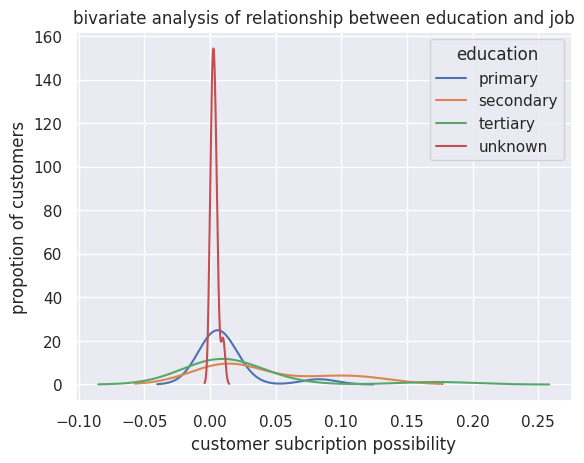

In [ ]:
sns.set_theme(style='darkgrid')
pd.crosstab(df.job, df.education,normalize=True).plot(kind='kde')
plt.title('bivariate analysis of relationship between education and job')
plt.xlabel('customer subcription possibility')
plt.ylabel('propotion of customers')

Text(0, 0.5, 'propotion of customers')

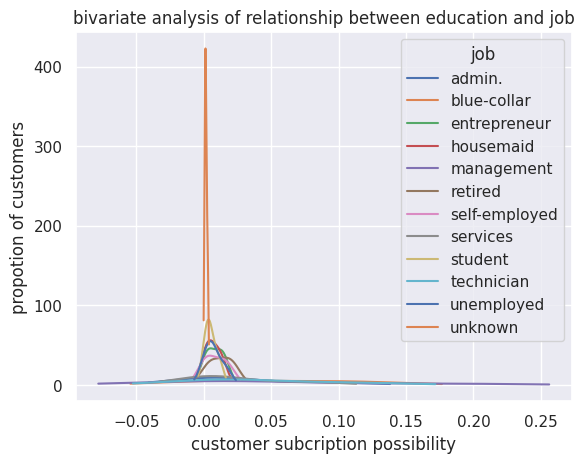

In [ ]:
sns.set_theme(style='darkgrid')
pd.crosstab(df.education, df.job,normalize=True).plot(kind='kde')
plt.title('bivariate analysis of relationship between education and job')
plt.xlabel('customer subcription possibility')
plt.ylabel('propotion of customers')

Numerical Features: ["age", "balance", "duration", "campaign", "pdays", "previous"]

# **outliers removal in  df data**

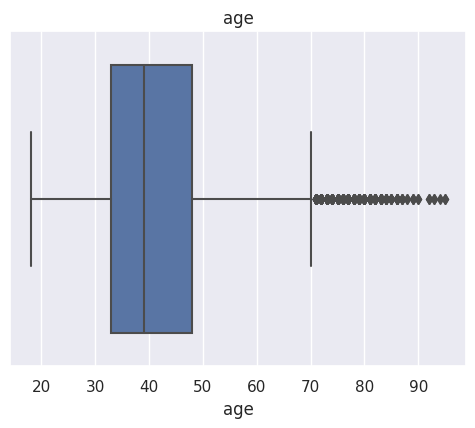

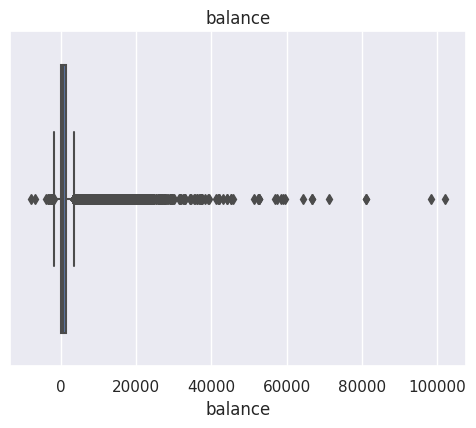

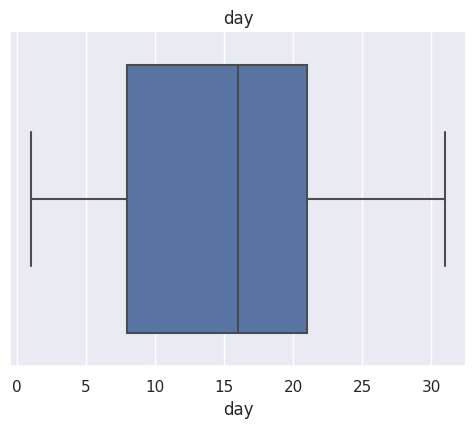

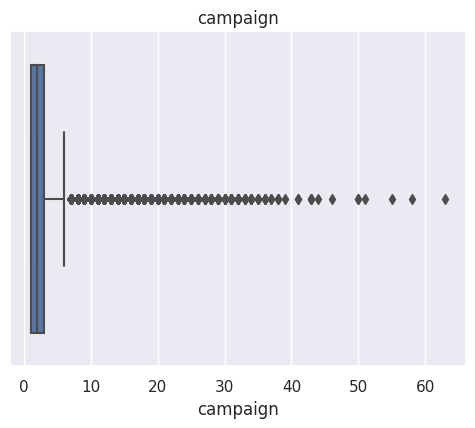

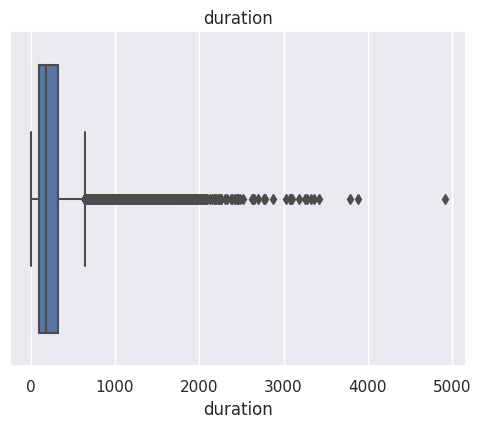

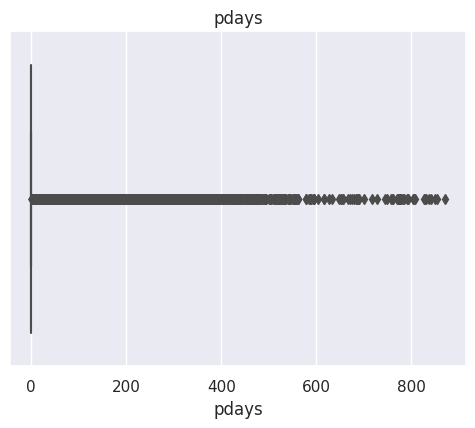

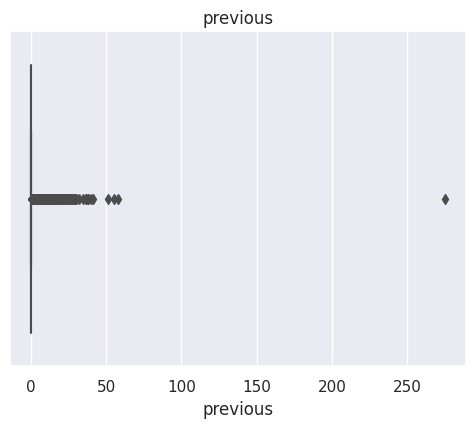

In [ ]:
cols = ['age', 'balance', 'day', 'campaign', 'duration','pdays', 'previous']

n = 1  # Initializing the subplot counter

for i in cols:
    plt.figure(figsize=(20, 20))
    plt.subplot(4, 3, n)
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()
    n += 1

In [25]:
#removing outliers in balance
import numpy as np
dfw=df['balance']
IQR=(dfw.quantile(0.75)-(dfw.quantile(0.25)))
lower=dfw.quantile(0.25)-(1.5*IQR)
upper=dfw.quantile(0.25)+(1.5*IQR)
df=df[~((dfw<lower)|(dfw>upper))]

In [26]:
bal99=df.balance.quantile(0.99)
df=df[~ (df.balance > bal99)]

In [27]:
#removing outliers in duration
import numpy as np
dfd=df['duration']
d_IQR=(dfd.quantile(0.75)-(dfd.quantile(0.25)))
d_lower=dfd.quantile(0.25)-(1.5*d_IQR)
d_upper=dfd.quantile(0.25)+(1.5*d_IQR)
df=df[~((dfd<d_lower)|(dfd>d_upper))]

In [28]:
dur99=df.duration.quantile(0.99)
df=df[~ (df.duration > dur99)]


In [29]:
#removing outliers in campaign
import numpy as np
dfc=df['campaign']
c_IQR=(dfc.quantile(0.75)-(dfc.quantile(0.25)))
c_lower=dfc.quantile(0.25)-(1.5*c_IQR)
c_upper=dfc.quantile(0.25)+(1.5*c_IQR)
df=df[~((dfc<c_lower)|(dfc>c_upper))]

In [30]:
cam99=df.campaign.quantile(0.99)
df=df[~ (df.campaign > cam99)]

In [31]:
# finding correlation with style visualization
df_corr=df.corr().style.background_gradient(axis=None)
df_corr

<ipython-input-31-657a1ae28143>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr().style.background_gradient(axis=None)


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.060976,-0.009486,-0.027402,0.030256,-0.032380,-0.010754
balance,0.060976,1.000000,-0.007822,0.015941,-0.016477,0.038153,0.037583
day,-0.009486,-0.007822,1.000000,-0.040323,0.094215,-0.080885,-0.040320
duration,-0.027402,0.015941,-0.040323,1.000000,-0.037694,0.020136,0.025260
campaign,0.030256,-0.016477,0.094215,-0.037694,1.000000,-0.067207,-0.014498
pdays,-0.032380,0.038153,-0.080885,0.020136,-0.067207,1.000000,0.408925
previous,-0.010754,0.037583,-0.040320,0.025260,-0.014498,0.408925,1.000000


## ***Label Encoding***

In [32]:
#label encoding for df data
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df.columns:
    df[i]=encoder.fit_transform(df[i])

<Axes: >

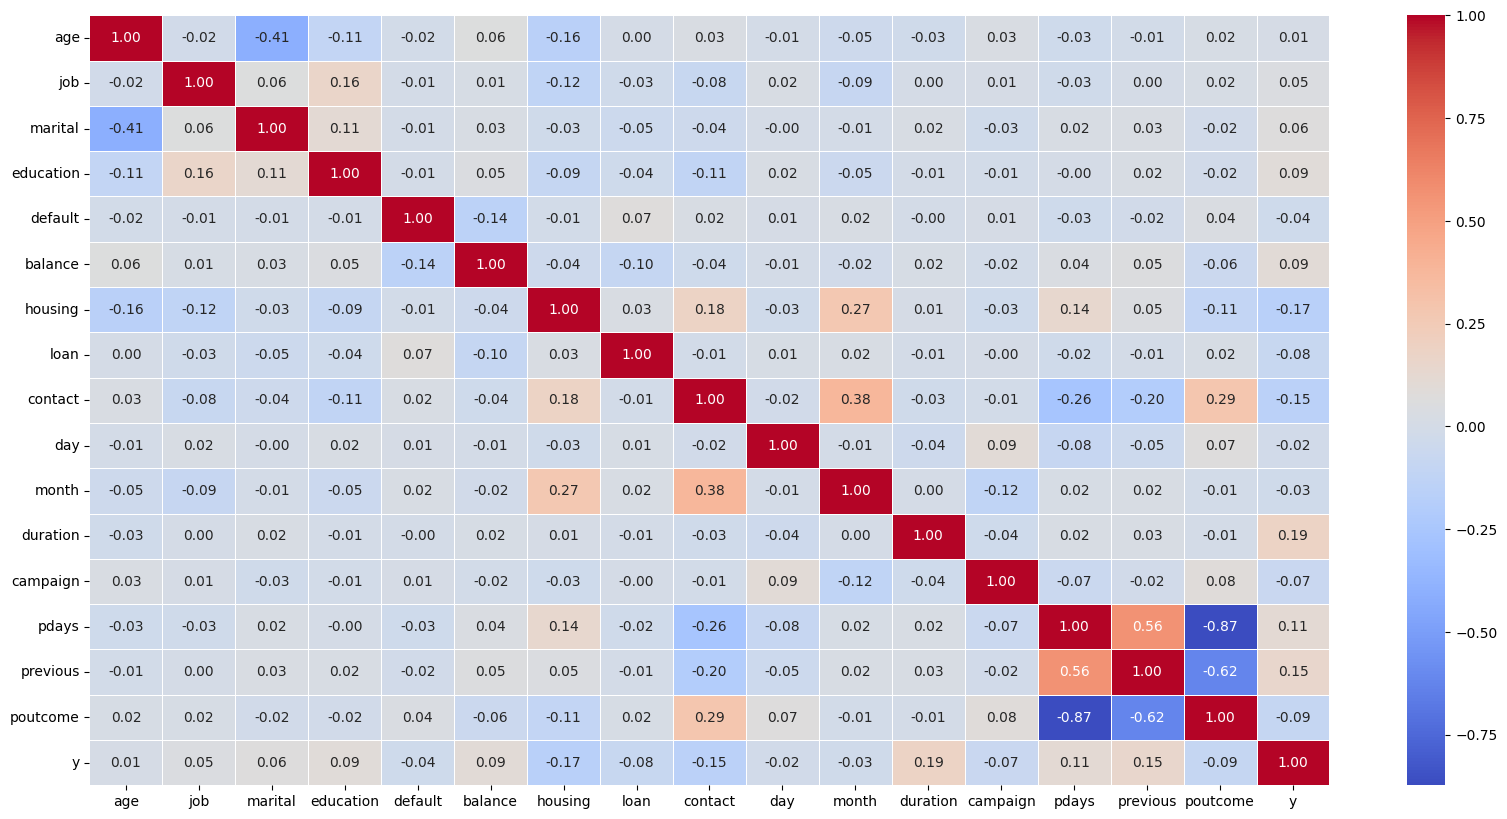

In [33]:
#plot for corr variables
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm',fmt='.2f', linewidths=0.5)

## Handling imbalanced data

In [34]:
x=df.drop(['y'],axis=1) #contain all  independent variable
y=df['y']           #dependent variable
df['y'].value_counts()

0    24586
1     1732
Name: y, dtype: int64

In [35]:

from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
x_new,y_new=os.fit_resample(x,y)

# **MODEL BUILDING**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [38]:
#dividing the dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(x_train)
xtest=scaler.transform(x_test)


(39337, 16) (9835, 16) (39337,) (9835,)


# **LOGISTIC REGRESSION**

In [39]:
from sklearn.linear_model import LogisticRegression
from  sklearn.preprocessing import StandardScaler
x=df.drop(["y","day"],axis = 1)
y = df['y']

reg = LogisticRegression()
reg.fit(x_train,y_train)
#PREDICTION
prediction = reg.predict(x_test)
#ACCURACY
accuracy=accuracy_score(y_test,prediction)
#CONFUSION MATRIX
confusion = confusion_matrix(y_test,prediction)
#CLASSIFICATION REPORT
classification = classification_report(y_test,prediction)
#PRECISION
precision_lr=precision_score(y_test,prediction)
#RECALL
recall_lr=recall_score(y_test,prediction)
#F1SCORE
f1score_lr=f1_score(y_test,prediction)

print('accuracy score:',accuracy)
print('confusion matrix:\n',confusion)
print("classification report:\n",classification)
print("precision score",precision_lr)
print("recall score",recall_lr)
print("F1 score",f1score_lr)

accuracy score: 0.7598373157092019
confusion matrix:
 [[3666 1257]
 [1105 3807]]
classification report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76      4923
           1       0.75      0.78      0.76      4912

    accuracy                           0.76      9835
   macro avg       0.76      0.76      0.76      9835
weighted avg       0.76      0.76      0.76      9835

precision score 0.7517772511848341
recall score 0.7750407166123778
F1 score 0.7632317562149157


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **DECISION TREE**

In [40]:
from sklearn.tree import DecisionTreeClassifier
x=df.drop('y',axis = 1)
y=df['y']
x=pd.get_dummies(x,drop_first=1)


clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)


#PREDICTION
y_pred_dt= clf.predict(x_test)
#ACCURACY
accuracy_dt=accuracy_score(y_test,y_pred_dt)
print('accuracy:',accuracy_dt)
#CONFUSION MATRIX
confusion_dt= confusion_matrix(y_test,y_pred_dt)
print('confusion matrix:\n',confusion_dt)
#CLASSIFICATION REPORT
classification_dt= classification_report(y_test,y_pred_dt)
print("classification report:\n",classification_dt)
#PRECISION
precision_dt=precision_score(y_test,y_pred_dt)
print('precision score:',precision_dt)
#RECALL
recall_dt=recall_score(y_test,y_pred_dt)
print('recall score:',recall_dt)
#F1SCORE
f1score_dt=f1_score(y_test,y_pred_dt)
print('F1 score:',f1score_dt)

accuracy: 0.9754956786985257
confusion matrix:
 [[4682  241]
 [   0 4912]]
classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      4923
           1       0.95      1.00      0.98      4912

    accuracy                           0.98      9835
   macro avg       0.98      0.98      0.98      9835
weighted avg       0.98      0.98      0.98      9835

precision score: 0.9532311274985446
recall score: 1.0
F1 score: 0.9760556383507203


# **RANDOM FOREST**

In [41]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=43)
random_forest.fit(x_train,y_train)

#PREDICTION
y_pred_rf=random_forest.predict(x_test)
#ACCURACY
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print('accuracy:',accuracy_rf)
#CONFUSION MATRIX
confusion_rf= confusion_matrix(y_test,y_pred_rf)
print('confusion matrix:\n',confusion_rf)
#CLASSIFICATION REPORT
classification_rf= classification_report(y_test,y_pred_rf)
print("classification report:\n",classification_rf)
#PRECISON
precision_rf=precision_score(y_test,y_pred_rf)
print('precision:',precision_rf)
#RECALL
recall_rf=recall_score(y_test,y_pred_rf)
print('recall:',recall_rf)
#F1SCORE
f1score_rf=f1_score(y_test,y_pred_rf)
print('F1 score:',f1score_rf)

accuracy: 0.9899339095068632
confusion matrix:
 [[4824   99]
 [   0 4912]]
classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      4923
           1       0.98      1.00      0.99      4912

    accuracy                           0.99      9835
   macro avg       0.99      0.99      0.99      9835
weighted avg       0.99      0.99      0.99      9835

precision: 0.9802434643783676
recall: 1.0
F1 score: 0.9900231784742518


# **HYPERPARAMETER TUNING**

In [42]:
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier()
param_grid ={
        'n_estimators' : [100,200,300],
        'max_depth':[10,20,30],
        'min_samples_split':[2,5,10],
        'min_samples_leaf':[1,2,4]
}
grid_search = GridSearchCV(estimator = rf_classifier,param_grid = param_grid,cv= 5 )
grid_search.fit(x_train,y_train)
#get the best parameters and the best estimator
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_
#print the best parameters
print("Best Parameters:",best_params)
#evaluvate the model on the test data
test_accuracy = best_rf_classifier.score(x_test,y_test)
print("test Accuracy:",test_accuracy)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
test Accuracy: 0.9895271987798678


## Dimension Reduction

# **RandomForest with PCA**

In [43]:
from sklearn.decomposition import PCA
n_components = 10 #the number of principal components
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)


In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=45)#the number of iteration
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=200, random_state=45)

In [ ]:
#PREDICTION
y_pred_pca= rf_model.predict(X_test_pca)
#ACCURACY
Accuracy_pca=accuracy_score(y_test,y_pred_pca)
print('accuracy:',Accuracy_pca)
#PRECISION
Precision_pca=precision_score(y_test,y_pred_pca)
print('Precision :',Precision_pca)
#RECALL
Recall_pca=recall_score(y_test,y_pred_pca)
print('recall:',Recall_pca)
#F1SCORE
F1score_pca=f1_score(y_test,y_pred_pca)
print('F1 score:',F1score_pca)

accuracy: 0.9914590747330961
Precision : 0.9831865492393915
recall: 1.0
F1 score: 0.9915220024222849


# **K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

#prediction
y_pred=knn.predict(x_test)
y_pred

#score
score_k=knn.score(x_train,y_train)*100
print("score",score_k)

score 94.94114955385515


# **XGBoost**

In [ ]:
# Install
!pip install xgboost
# Import
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

#PREDICTION
y_pred_xg=xgb.predict(x_test)
#ACCURACY
accuracy_xg=accuracy_score(y_test,y_pred_xg)
print('accuracy:',accuracy_xg)
#CONFUSION MATRIX
confusion_xg= confusion_matrix(y_test,y_pred_xg)
print('confusion matrix:\n',confusion_xg)
#CLASSIFICATION REPORT
classification_xg= classification_report(y_test,y_pred_xg)
print("classification report:\n",classification_xg)
#PRECISION
precision_xg=precision_score(y_test,y_pred_xg)
print('precision:',precision_xg)
#RECALL
recall_xg=recall_score(y_test,y_pred_xg)
print('recall:',recall_xg)
#F1SCORE
f1score_xg=f1_score(y_test,y_pred_xg)
print('F1 score:',f1score_xg)

accuracy: 0.9712252160650737
confusion matrix:
 [[4668  255]
 [  28 4884]]
classification report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      4923
           1       0.95      0.99      0.97      4912

    accuracy                           0.97      9835
   macro avg       0.97      0.97      0.97      9835
weighted avg       0.97      0.97      0.97      9835

precision: 0.950379451255108
recall: 0.994299674267101
F1 score: 0.971843597651975


# **XGBoost With PCA**

In [ ]:
from sklearn.decomposition import PCA
n_components = 10 # Choose the number of principal components
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

In [ ]:
xg_model = XGBClassifier(n_estimators=300, random_state=42)
xg_model.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
#PREDICTION
y_pred_xg= xg_model.predict(X_test_pca)
#ACCURACY
Accuracy_xg=accuracy_score(y_test,y_pred_xg)
print('accuracy:',Accuracy_xg)
#PRECISION
Precision_xg=precision_score(y_test,y_pred_xg)
print('Precision :',Precision_xg)
#RECALL
Recall_xg=recall_score(y_test,y_pred_xg)
print('recall:',Recall_xg)
#F1SCORE
F1score_xg=f1_score(y_test,y_pred_xg)
print('F1score:',F1score_xg)

accuracy: 0.9825114387391968
Precision : 0.966168371361133
recall: 1.0
F1score: 0.9827931172468987


In [ ]:
from tabulate import tabulate



data = [
    ["RANDOM FOREST", accuracy_rf],
    ["RANDOM FOREST WITH PCA", Accuracy_pca],
    ["HYPERPARAMETER TUNING",test_accuracy],
    ["DECISION TREE", accuracy_dt],
    ["KNN", score_k],
    ["XG BOOST", accuracy_xg],
    ["XG BOOST WITH PCA", Accuracy_xg]
]

col_names = ["Model", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))


╒════════════════════════╤══════════════╕
│ Model                  │   Test Score │
╞════════════════════════╪══════════════╡
│ RANDOM FOREST          │     0.989832 │
├────────────────────────┼──────────────┤
│ RANDOM FOREST WITH PCA │     0.991459 │
├────────────────────────┼──────────────┤
│ HYPERPARAMETER TUNING  │     0.989426 │
├────────────────────────┼──────────────┤
│ DECISION TREE          │     0.978749 │
├────────────────────────┼──────────────┤
│ KNN                    │    94.9411   │
├────────────────────────┼──────────────┤
│ XG BOOST               │     0.971225 │
├────────────────────────┼──────────────┤
│ XG BOOST WITH PCA      │     0.982511 │
╘════════════════════════╧══════════════╛


In [ ]:
data=[["RANDOM FOREST",accuracy_rf,precision_rf,recall_rf,f1score_rf],
      ["RANDOM FOREST WITH PCA",Accuracy_pca,Precision_pca,Recall_pca,F1score_pca],
      ["DECISION TREE",accuracy_dt,precision_dt,recall_dt,f1score_dt],
      ["XG BOOST",accuracy_xg,precision_xg,recall_xg,f1score_xg],
      ["XG BOOST WITH PCA",Accuracy_xg,Precision_xg,Recall_xg,F1score_xg]
      ]

col_names = ["MODEL","ACCURACY SCORE","PRECISION SCORE","RECALL SCORE","F1 SCORE"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒════════════════════════╤══════════════════╤═══════════════════╤════════════════╤════════════╕
│ MODEL                  │   ACCURACY SCORE │   PRECISION SCORE │   RECALL SCORE │   F1 SCORE │
╞════════════════════════╪══════════════════╪═══════════════════╪════════════════╪════════════╡
│ RANDOM FOREST          │         0.989832 │          0.980048 │         1      │   0.989923 │
├────────────────────────┼──────────────────┼───────────────────┼────────────────┼────────────┤
│ RANDOM FOREST WITH PCA │         0.991459 │          0.983187 │         1      │   0.991522 │
├────────────────────────┼──────────────────┼───────────────────┼────────────────┼────────────┤
│ DECISION TREE          │         0.978749 │          0.959188 │         1      │   0.979169 │
├────────────────────────┼──────────────────┼───────────────────┼────────────────┼────────────┤
│ XG BOOST               │         0.971225 │          0.950379 │         0.9943 │   0.971844 │
├────────────────────────┼──────────────